## Backgorund 

Dihydrofolate Reductase (**DHFR**) is an essential enzyme involved in the folate metabolic pathway. Folate is an organic molecule required for various cellular processes, including DNA synthesis and repair. DHFR plays a key role in converting dihydrofolate into tetrahydrofolate, a biologically active form of folate.

Cancer cells often divide more rapidly than healthy cells, and they have an increased demand for DNA synthesis. Inhibiting the catalytic activity of DHFR can disrupt the production of tetrahydrofolate, which is necessary for DNA synthesis. This disruption can slow down or prevent cancer cell replication, making DHFR an important target for cancer treatment

**IC50** (Inhibitory Concentration at 50%): IC50 is a measure of the concentration of a substance (e.g., a drug or inhibitor) required to inhibit a biological or biochemical process by 50%. It quantifies the potency of the substance, with lower IC50 values indicating higher potency.

**pIC50** (Negative Logarithm of IC50): pIC50 = -log10(IC50). It is often used in pharmacology and drug discovery to express the potency of a substance. Higher pIC50 values correspond to more potent substances, with a lower concentration needed to achieve 50% inhibition. For example, a compound with a pIC50 of 7 is generally considered more potent than one with a pIC50 of 6 when inhibiting DHFR.

## Data
Downloaded from https://github.com/KISysBio/qsar-models/tree/master


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rdkit.Chem import MolFromSmiles

In [2]:
def get_scatterplot(x, y, df):
    """
    Create a scatter plot of two columns from a DataFrame.

    Parameters
    ----------
    x (str): The column name for the x-axis.
    y (str): The column name for the y-axis.
    df (pd.DataFrame): The DataFrame containing the data.

    Returns
    -------
    None: The function displays the scatter plot but doesn't return a value.
    """
    x_data = df[x]
    y_data = df[y]
    plt.scatter(x_data, y_data)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"Scatter Plot of {x} vs. {y}")

In [3]:
data_file = "data/hDHFR.xlsx"
xls = pd.ExcelFile(data_file)
sheet_names = xls.sheet_names
print(sheet_names)

['features', 'normalised_features', 'metadata', 'ECFP4_bits']


In [4]:
norm_features = pd.read_excel(data_file, sheet_name="normalised_features")
print(norm_features.shape)
norm_features.columns

(560, 81)


Index(['XLogP', 'LipinskiFailures', 'nRotB', 'MLogP', 'nAtomLAC', 'nAtomP',
       'nAtomLC', 'nBase', 'naAromAtom', 'ALogP', 'ALogp2', 'nSmallRings',
       'nRingBlocks', 'nAromBlocks', 'nRings6', 'WPATH', 'WTPT.2', 'WTPT.4',
       'WTPT.5', 'MDEC.11', 'MDEC.12', 'MDEC.13', 'MDEC.22', 'MDEC.23',
       'MDEC.33', 'MDEO.11', 'MDEO.22', 'MDEN.11', 'MDEN.12', 'MDEN.13',
       'MDEN.22', 'khs.ssCH2', 'khs.dsCH', 'khs.aaCH', 'khs.sssCH', 'khs.tsC',
       'khs.dssC', 'khs.aasC', 'khs.aaaC', 'khs.ssssC', 'khs.sNH2', 'khs.ssNH',
       'khs.aaNH', 'khs.aaN', 'khs.sssN', 'khs.aasN', 'khs.sOH', 'khs.ssO',
       'khs.aaO', 'khs.ssS', 'khs.aaS', 'khs.sCl', 'HybRatio', 'FMF', 'ECCEN',
       'SP.7', 'VP.7', 'SPC.6', 'VPC.6', 'SC.3', 'SC.5', 'VC.3', 'VC.5',
       'SCH.5', 'SCH.6', 'SCH.7', 'VCH.5', 'VCH.6', 'C1SP2', 'C2SP2', 'C3SP2',
       'C1SP3', 'C2SP3', 'C3SP3', 'ATSp5', 'ATSm1', 'tpsaEfficiency.1',
       'nHBDon', 'bpol', 'topoShape.1', 'pIC50'],
      dtype='object')

In [5]:
metadata = pd.read_excel(data_file, sheet_name="metadata")
print(metadata.shape)
metadata.columns

(560, 65)


Index(['PARENT_CMPD_CHEMBLID', 'CMPD_CHEMBLID', 'MOLREGNO', 'PARENT_MOLREGNO',
       'MOL_PREF_NAME', 'COMPOUND_KEY', 'MOLWEIGHT', 'ALOGP', 'PSA',
       'NUM_RO5_VIOLATIONS', 'CANONICAL_SMILES', 'ACTIVITY_ID',
       'STANDARD_TYPE', 'RELATION', 'STANDARD_VALUE', 'STANDARD_UNITS',
       'PCHEMBL_VALUE', 'PUBLISHED_TYPE', 'PUBLISHED_RELATION',
       'PUBLISHED_VALUE', 'PUBLISHED_UNITS', 'ACTIVITY_COMMENT',
       'DATA_VALIDITY_COMMENT', 'POTENTIAL_DUPLICATE', 'BAO_ENDPOINT',
       'UO_UNITS', 'QUDT_UNITS', 'ASSAY_ID', 'ASSAY_CHEMBLID', 'ASSAY_TYPE',
       'DESCRIPTION', 'ASSAY_SRC_ID', 'ASSAY_SRC_DESCRIPTION',
       'ASSAY_ORGANISM', 'ASSAY_STRAIN', 'ASSAY_TAX_ID', 'CURATED_BY',
       'BAO_FORMAT', 'TID', 'TARGET_CHEMBLID', 'TARGET_TYPE',
       'PROTEIN_ACCESSION', 'PREF_NAME', 'ORGANISM', 'CONFIDENCE_SCORE',
       'TARGET_MAPPING', 'APD_NAME', 'APD_CONFIDENCE', 'DOC_ID',
       'DOC_CHEMBLID', 'PUBMED_ID', 'JOURNAL', 'YEAR', 'VOLUME', 'ISSUE',
       'FIRST_PAGE', 'CELL_ID',

In [6]:
# add the cananical smiles to the dataset with pIC50 values
data = pd.concat([norm_features, metadata[["CANONICAL_SMILES"]]], axis=1)
assert len(data) == len(norm_features) == len(metadata)
print(f"Number of unique SMILES is {data['CANONICAL_SMILES'].nunique()}")

Number of unique SMILES is 560


## Inspect the relationship between some of the features and pIC50

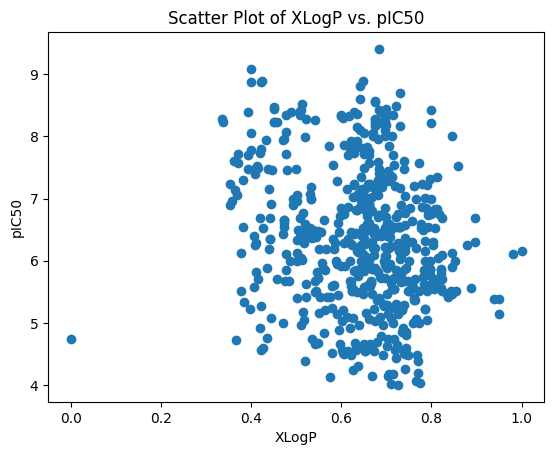

In [7]:
get_scatterplot("XLogP", "pIC50", data)

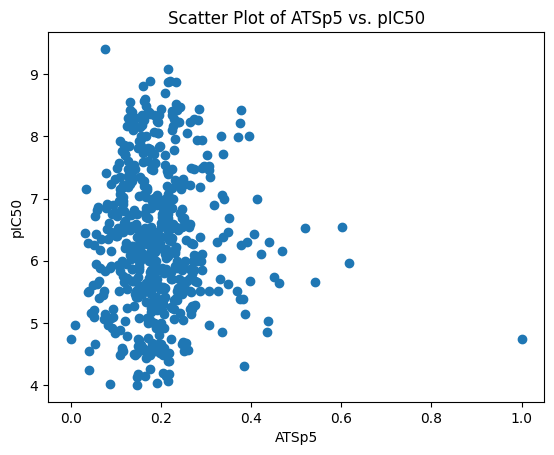

In [8]:
get_scatterplot("ATSp5", "pIC50", data)

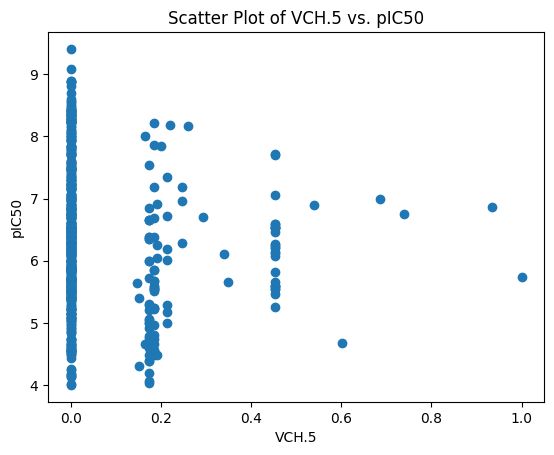

In [9]:
get_scatterplot("VCH.5", "pIC50", data)

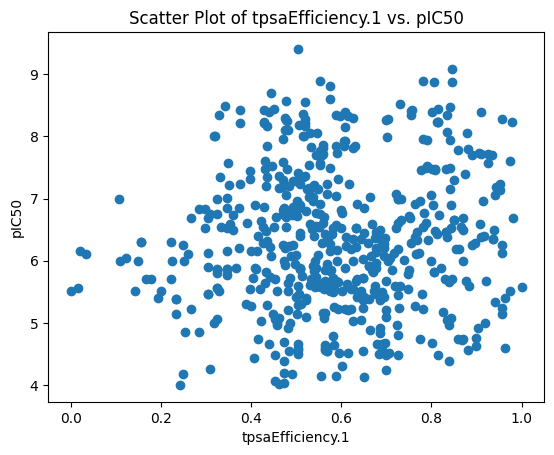

In [10]:
get_scatterplot("tpsaEfficiency.1", "pIC50", data)

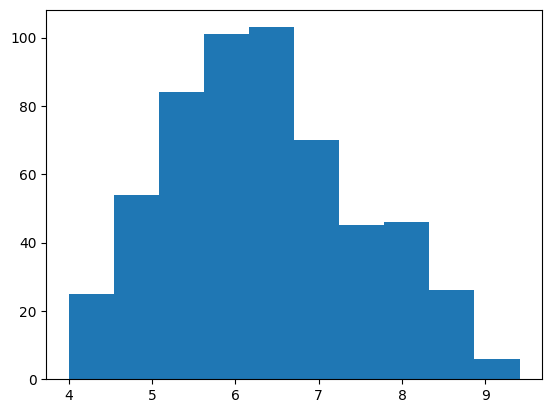

In [11]:
# inspect the distribution of the pIC50 values
plt.hist(data["pIC50"]);

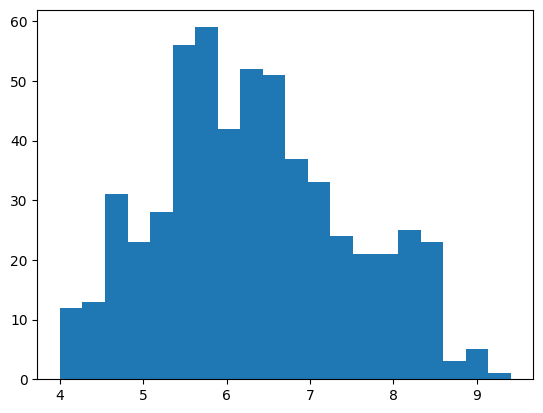

In [12]:
# inspect the distribution of the pIC50 values
plt.hist(data["pIC50"], bins=20);

## Inspect the structures of some of the "top" molecules

In [13]:
# Consider pIC50 values > 8 to be good
top_molecules = data[data["pIC50"] > 8].sort_values("pIC50", ascending=False)
print(f"There are {len(top_molecules)} molecules having a pIC50 value of at least 8.")

There are 58 molecules having a pIC50 value of at least 8.


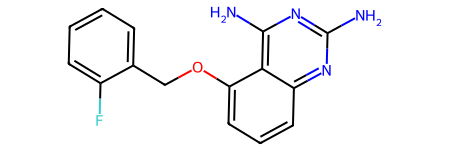

In [14]:
MolFromSmiles(top_molecules['CANONICAL_SMILES'].iloc[0])

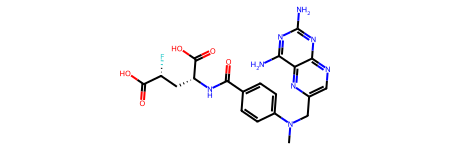

In [15]:
MolFromSmiles(top_molecules['CANONICAL_SMILES'].iloc[1])

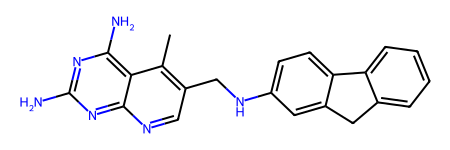

In [16]:
MolFromSmiles(top_molecules['CANONICAL_SMILES'].iloc[50])

In [17]:
# output the data to be used in modeling
data.to_csv("data/hDHFR_pIC50_data.csv", index=False)